<a href="https://colab.research.google.com/github/mapzine123/machine-running/blob/main/%ED%99%95%EB%A5%A0%EC%A0%81_%EA%B2%BD%EC%82%AC_%ED%95%98%EA%B0%95%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 로지스틱 회귀로 생선 7개의 확률은 계산했음
### 아 근데 생선을 공급하겠다는 업체가 너무 많아졌어..
### 샘플을 고르는 것도 힘들고, 추가되는 수산물은 샘플 자체가 없는 상황임
### 새로운 생선이 도착하는 대로 훈련 데이터를 제공하겠다고 하는데.. 어떤 생선이 먼저 올지도, 모든 생선이 도착하는걸 기다릴 수도 없는 상황!



---


# **점진적인 학습**
이번 문제는 훈련 데이터가 한 번에 준비되는 것이 아니라, 조금씩 전달된다는 것.

## Q. 기존의 훈련 데이터에 새로운 데이터를 추가해서 모델을 매일매일 훈련한다면?
## A. 시간이 지날수록 데이터가 늘어감. 중첩됨. 몇년이 지나면..?
<br>

## Q. 데이터를 추가할 때 이전 데이터를 버리면 훈련 데이터 크기를 일정하게 유지 할 수 있지않음?
## A. 버릴 때 다른 데이터에 없는 중요한 데이터가 포함되어 있으면 큰일임..
<br>

## Q. 앞서 훈련한 모델을 버리지 않고, 추가된 데이터로 기존 모델을 조금씩 더 훈련할 순 없을까?
## A. 그런 학습 방법을 **점진적 학습(온라인 학습)**이라고 부름.




#확률적 경사 하강법
## 확률적이다? : 무작위하게, 랜덤하게 라는 의미의 기술적 표현
## 경사? : 기울기
## 하강법? : 내려가는 방법
## 산을 내려온다고 할 때, 가장 빠른 길로 내려오려면 경사가 가장 가파른 길을 선택해야함
## 경사 하강법은 가장 가파른 경사를 따라 원하는 지점에 도달하는 것이 목표임
## 근데 너무 빨리 내려가면 오히려 올라갈 수 도 있음 (V자 형의 경사를 생각해 보라!)
## 즉, 조금씩 천천히 내려오는 것이 중요
## 확률적이 붙은 이유는 전체 샘플을 이용하지 않고, 딱 하나의 샘플을 훈련세트에서 "랜덤"하게 골라 가장 가파른 길을 찾는다.


---


# 경사 하강법 작동 방식


1. 훈련 세트에서 랜덤하게 하나의 샘플을 선택해 가파른 경사를 "조금" 내려감
2. 다음 훈련세트에서 또 랜덤하게 다른 샘플을 하나 선태갷 경사를 "조금" 내려감
3. 위 과정을 전체 샘플에 대해 반복
4. 이랬는데도 경사를 다 내려오지 못했으면 다시 처음부터 시작
5. 훈련세트에 모든 샘플을 다시 채워넣고 1,2를 반복
---
## 훈련 세트를 모두 사용하는 과정을 epoch라고 함
<br>

## ***미니 배치 경사 하강법*** : 샘플을 1개씩 말고 몇개의 샘플을 선택해 경사를 내려가는 것
## ***배치 경사 하강법*** : 샘플 전체를 한번에 사용해 경사를 내려가는 것
### 배치 경사 하강법은 가장 안전하지만, 그만큼 컴퓨터 자원을 많이 사용하게 됨
<br>

## 손실 함수 (loss function) : 우리가 내려가야 할 산
- 머신 러닝 알고리즘이 얼마나 엉터리인지를 측정하는 기준
- 어떤 값이 최솟값인지는 알지 못함
- 가능한 많이 찾아보고, 만족할만한 수준이라면 산을 다 내려왔다고 생각해야함
- 손실 함수는 미분이 가능해야함 (연속적이여야함)
<br>

## 비용 함수 (cost function)
- 훈련 세트에 있는 모든 샘플에 대한 손실 함수의 합

<br>

## 로지스틱 손실 함수
### 로지스틱 회귀에서 예측은 0, 1이지만, 확률은 0 ~ 1 사이의 어떤 값도 될 수 있었음.

### 가령 (예측, 정답) = (1, 1), (0, 1), (0, 0), (1, 0)으로 예측한 결과가 있다면
### 4개중 2개가 맞았으니 정확도 = 0.5임. 하지만 샘플이 4개면 0. 0.25, 0.5, 0.75, 1 이렇게만 정확도를 가지게 됨
### 연속적이지 않다! -> 미분 불가능!
<br>

### 위 샘플 4개의 확률을 가지고 한다면>
### 각 4개의 확률이 0.9, 0.3, 0.2, 0.8로 1, 0, 0, 1이 나왔다면?
### 예측 확률 * target data 를 한 후 음수로 바꿈
### ex) 0.9 * 1 => -0.9
### ex) 0.3 * 1 => -0.3
### ex) 0.2 * 0 => 0??
### 음성 클래스는 무조건 0이 될테니 이렇게 놔두면 곤란하다.
### target data를 양성 클래스처럼 바꿔서 1로 만들어야함
### 예측값도 양성 클래스에 대한 예측으로 바꿔야함
### ex) 1 - 0.2 * 1 => -0.8
### ex) 1 - 0.8 * 1 => -0.2
<br>

### 여기에 로그 함수를 적용하면 좋음
### 예측 확률은 0~1 사이인데, 로그함수는 이 사이에서 음수가 되어 최송 손실 값은 양수가 됨
### 그리고 로그함수는 0에 가까울 수록 아주 큰 음수가 되어 손실을 아주 크게 만들어 모델에 큰 영향을 끼칠 수 있음
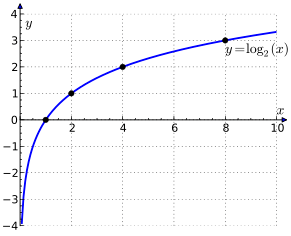
### 양성 클래스(target = 1)일 때 손실은 -log(예측확률)로 계산, 1에서 멀어질 수록 아주 큰 양수가 됨
### 음성 클래스(target = 0)일 때 손실은 -log(1-예측확률)로 계산, 0에서 멀어질 수록 아주 큰 양수가 됨

In [ ]:
# SGD Classifier

# 데이터 가져오기
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')

# 입력 데이터, 타깃데이터 나누기
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish[['Species']].to_numpy()

# train set, target set 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

# 특성 표준화 전처리
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

# SGDClassifier 사용
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log', max_iter=10, random_state=42) # logg : 손실 함수 종류 지정, max_iter = epoch 횟수 지정
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target)) # 0.773
print(sc.score(test_scaled, test_target)) # 0.775

# 정확도가 낮은건 epoch가 모자란 것같음

# SGDClassifier 객체를 다시 만들지 않고, 추가 학습 시키기 : partial_fit
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target)) # 0.815
print(sc.score(test_scaled, test_target)) # 0.85

0.773109243697479
0.775
0.8151260504201681
0.85


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# epoch, 과대적합, 과소적합

## epoch 횟수가 적다 -> 모델이 훈련 세트를 덜 학습한다 (산을 다 내려오지 못하고 훈련을 마친다) -> 훈련 세트, 테스트 세트에 잘 맞지 않는 ***과소적합*** 된 모델일 가능성이 높다
## epoch 횟수가 충분히 많다 -> 훈련 세트를 완전히 학습한다 -> 훈련세트에 아주 잘 맞는 모델이 만들어진다. -> 테스트 세트엔 오히려 점수가 나쁜 ***과대적합*** 된 모델일 가능성이 높다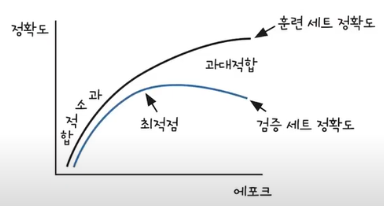
## 훈련 세트 점수는 에포크 진행 중 꾸준히 증가하다가 어느 순간 감소하기 시작함
## 이 부분이 과대 적합이 시작하는 곳
## 과대적합이 되기 전에 훈련을 멈추는 것을 ***Early stopping(조기종료)*** 라고 함

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


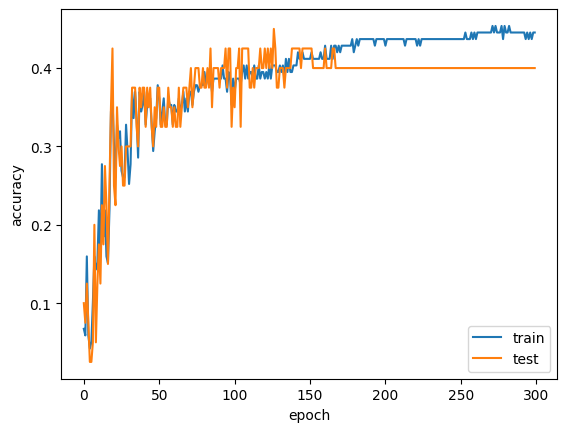

In [ ]:
import numpy as np
sc = SGDClassifier(loss='log', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)



for _ in range(0, 300) :
    sc.partial_fit(train_input, train_target.ravel(), classes=classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.legend(['train', 'test'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

대충 100번째 epoch에서 겹치고, 그 이후로는 train과 test의 점수가 벌어지고 있음

In [ ]:
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42) # tol : 향상될 최솟값, SGDClassifier에서는 일정 에포크동안 성능이 향상되지 않으면 early stopping을 함
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target)) # 0.957
print(sc.score(test_scaled, test_target)) # 0.925

0.957983193277311
0.925


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
